# Simulation

推定地が実際のデータをうまく再現できるかをチェックする

simulationの対象はmunicipality別の、候補者ごとの得票率

実際のデータではdataの3~6行が候補者別のvote数（clark, dean, edwards, kerryの順番）

データの見せ方は以下の二つ
- 州ごとにmunicipalityを候補者二人の得票率を軸とした六つの散布図にプロットする
- 州ごとにmunicipalityの結果を集計し、時系列データとして候補者ごとの得票率をプロットする

ひとまず実際のデータを上のようにプロットする

In [1]:
using Optim
using StatsFuns
using DataFrames
using Gadfly
using PyPlot

# inverse beta distribution function を行列に対応するように拡張
import StatsFuns.betainvcdf
betainvcdf(alpha::Number, beta::Number, x::Array) = reshape([betainvcdf(alpha, beta, i) for i in reshape(x, 1, size(x, 1)*size(x, 2)) ], size(x, 1), size(x, 2))

# maxをArray{String, 1}に対応するように拡張
# しかしArray型で入っているのでAnyに対応させる
import Base.max
max(number::Real, comparison::Any) = [max(number, parse(Int, i)) for i in comparison] 

# normpdfを配列に拡張
import StatsFuns.normpdf
normpdf(array::Array{Float64, 2}) = reshape([normpdf(i) for i in reshape(array, 1, size(array, 1)*size(array, 2))], size(array, 1), size(array, 2))

# Candを作る
include("bayes.jl");

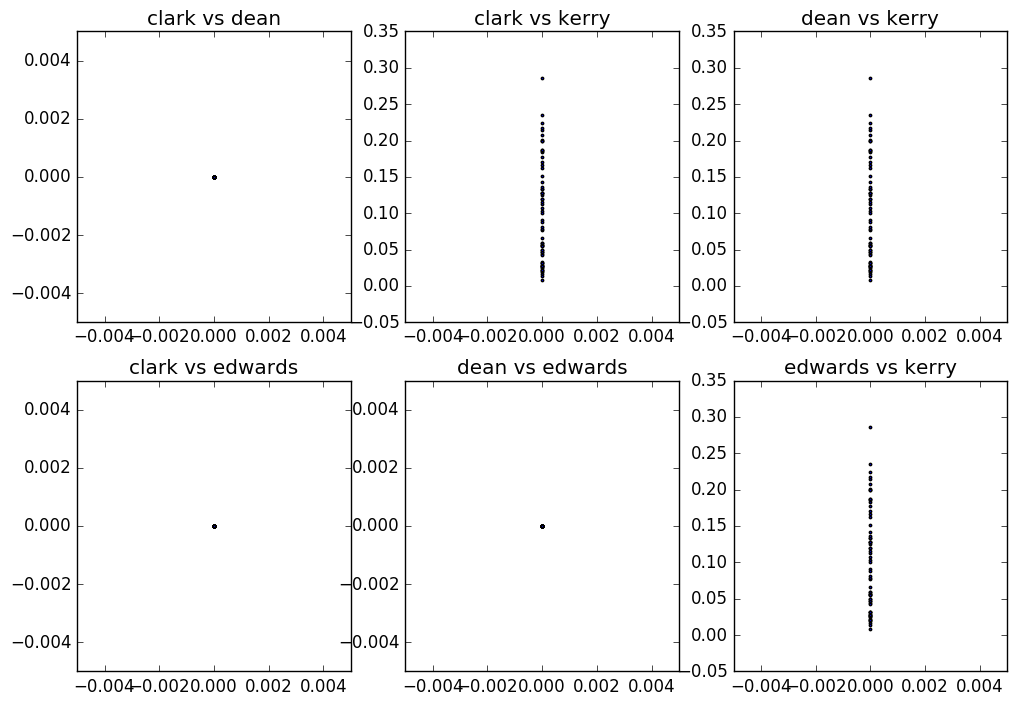

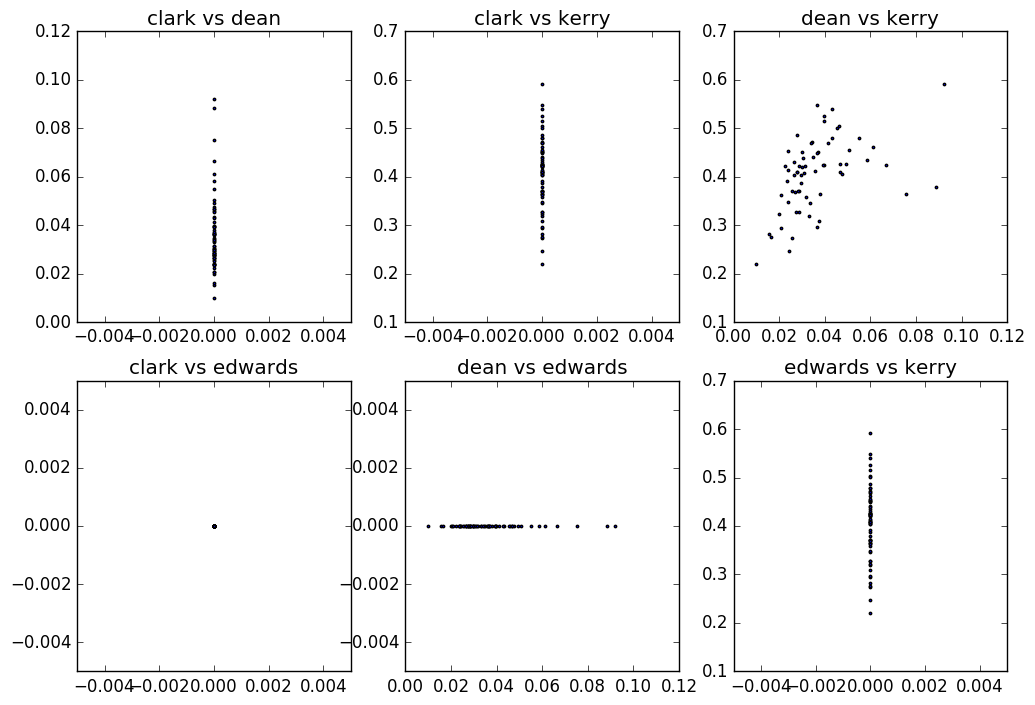

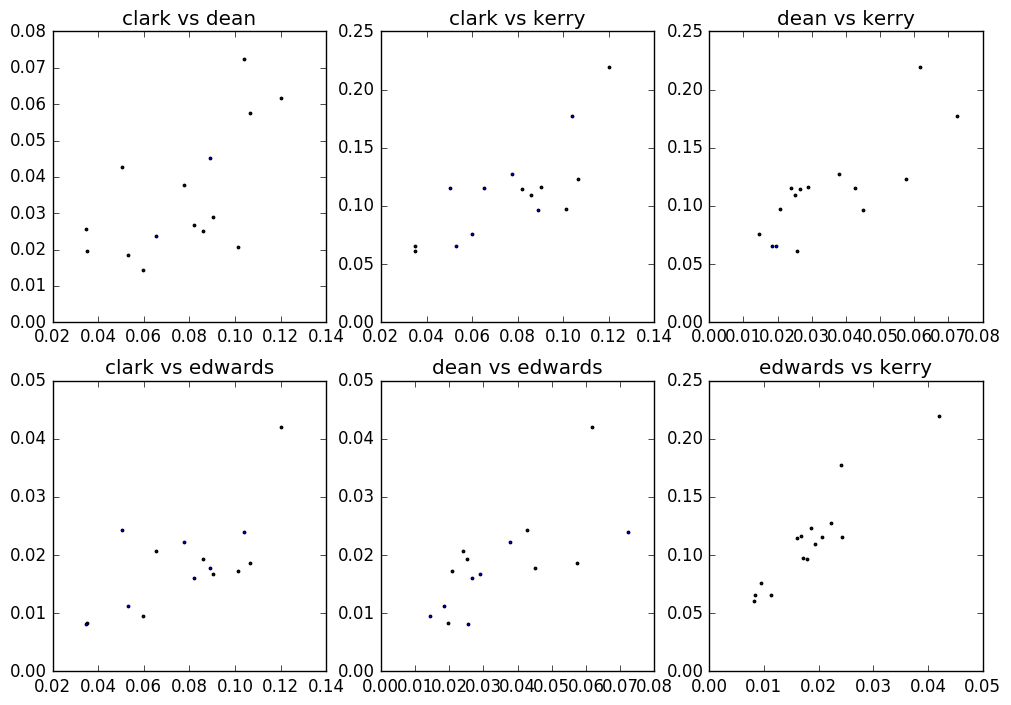

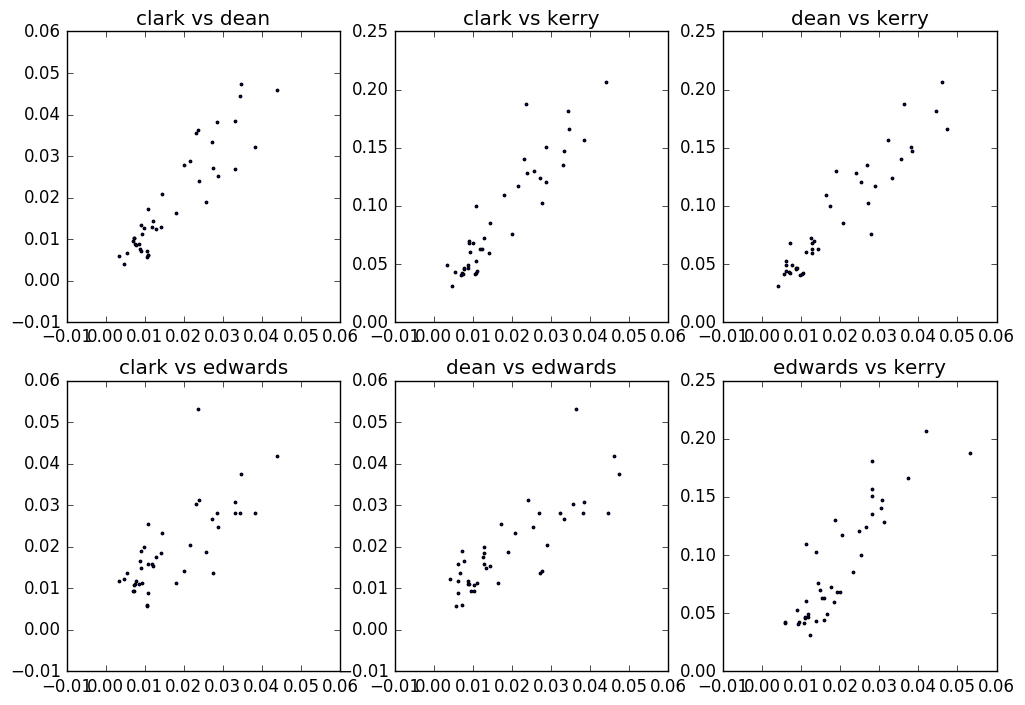

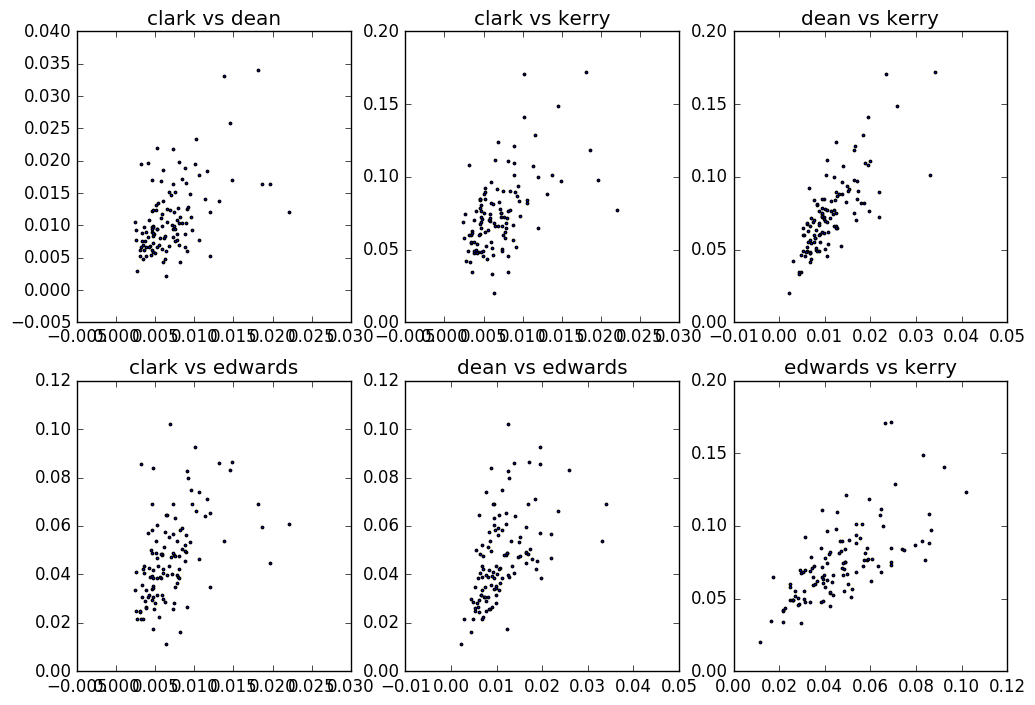

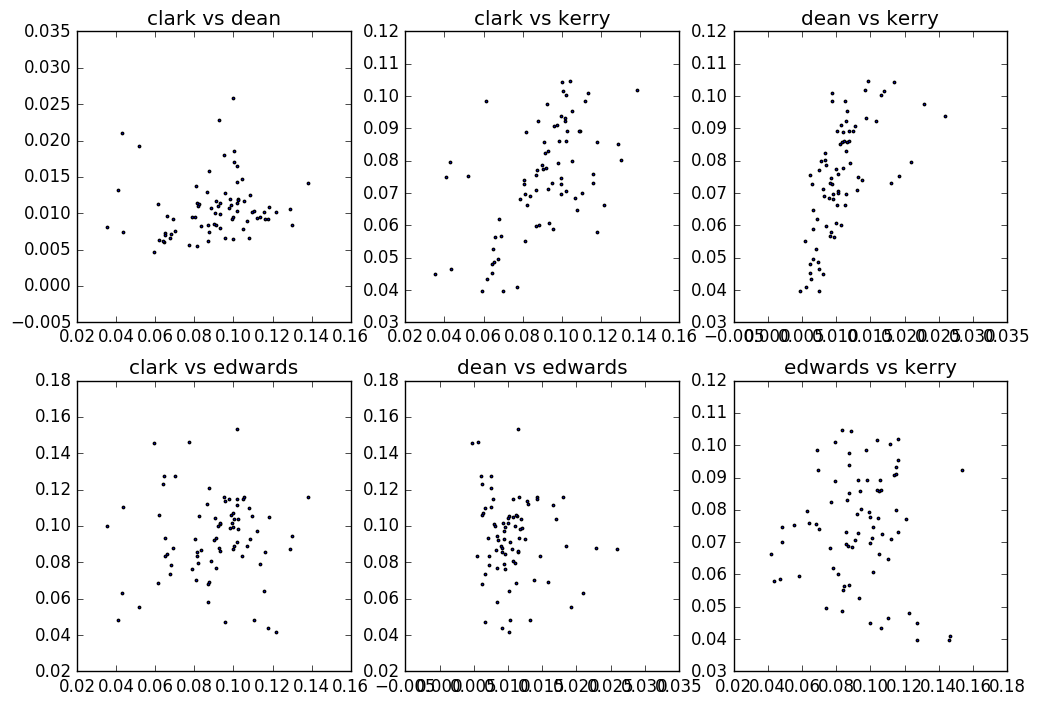

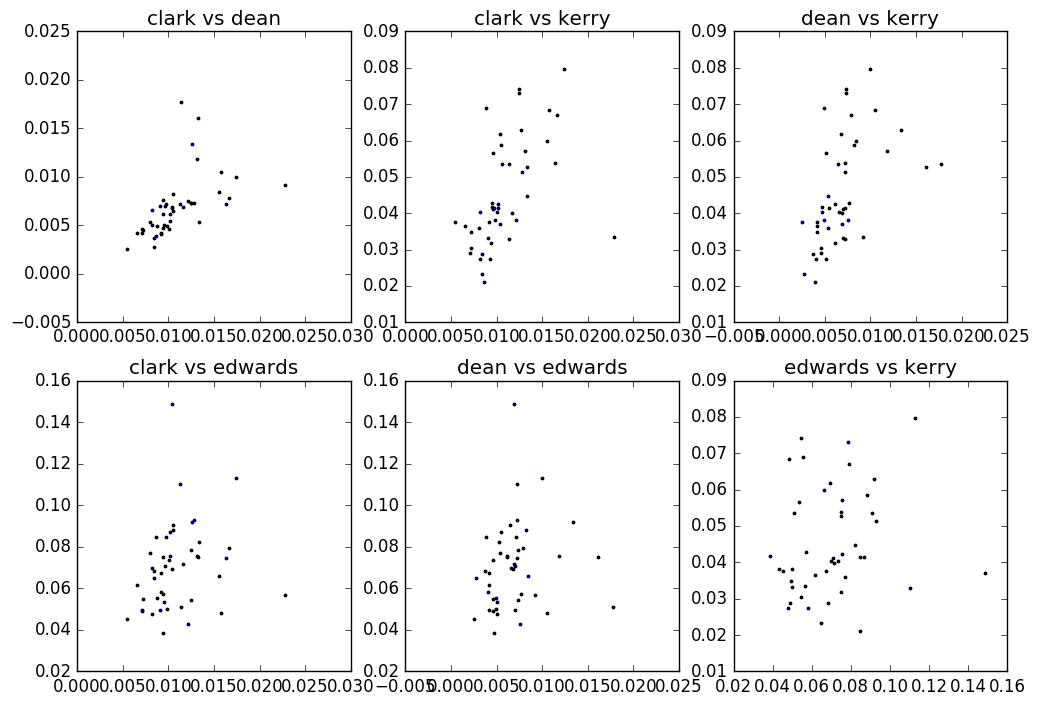

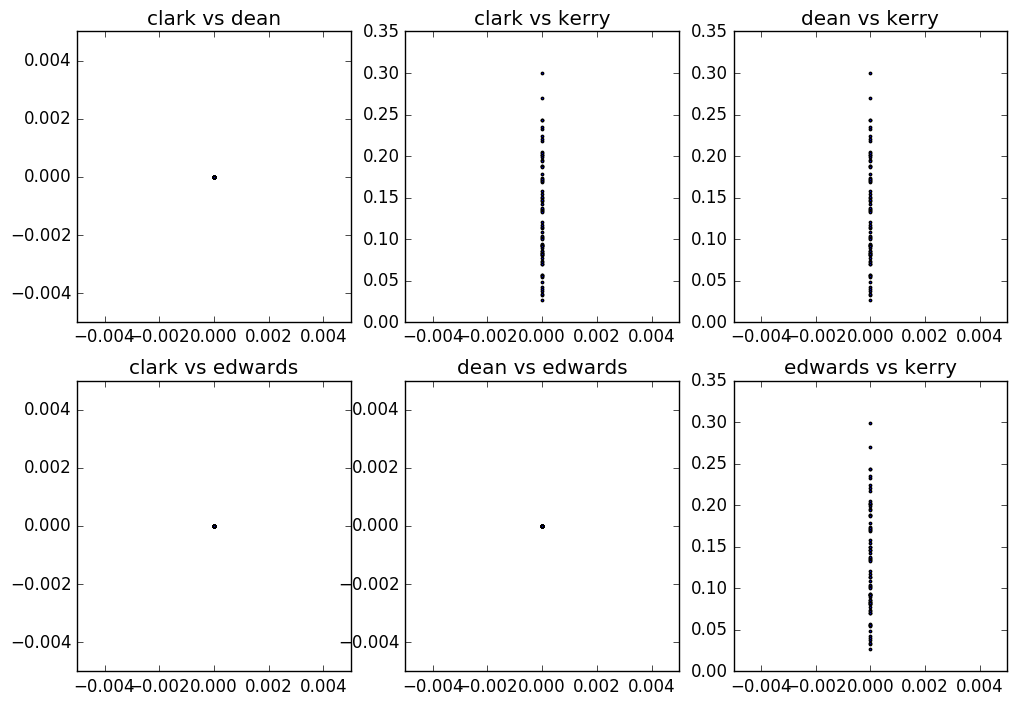

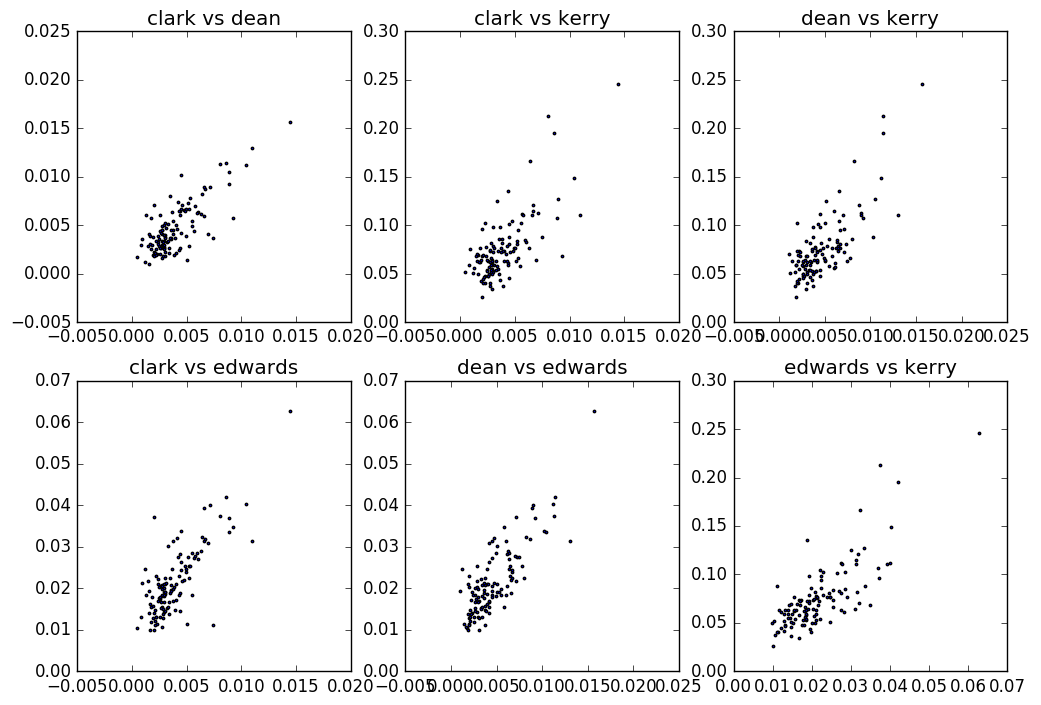

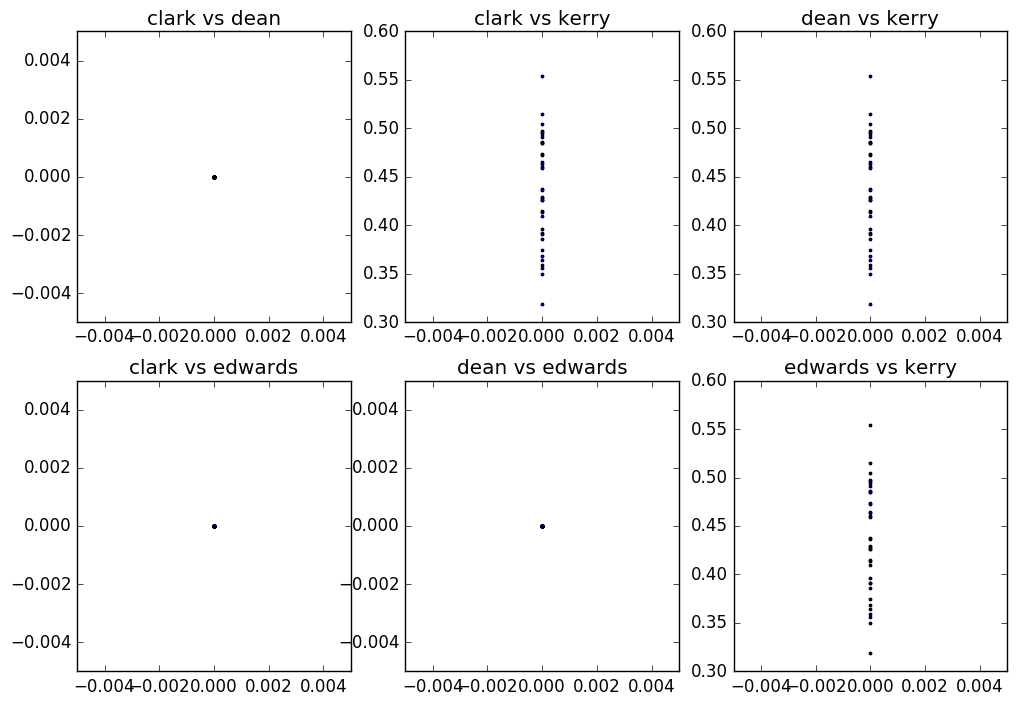

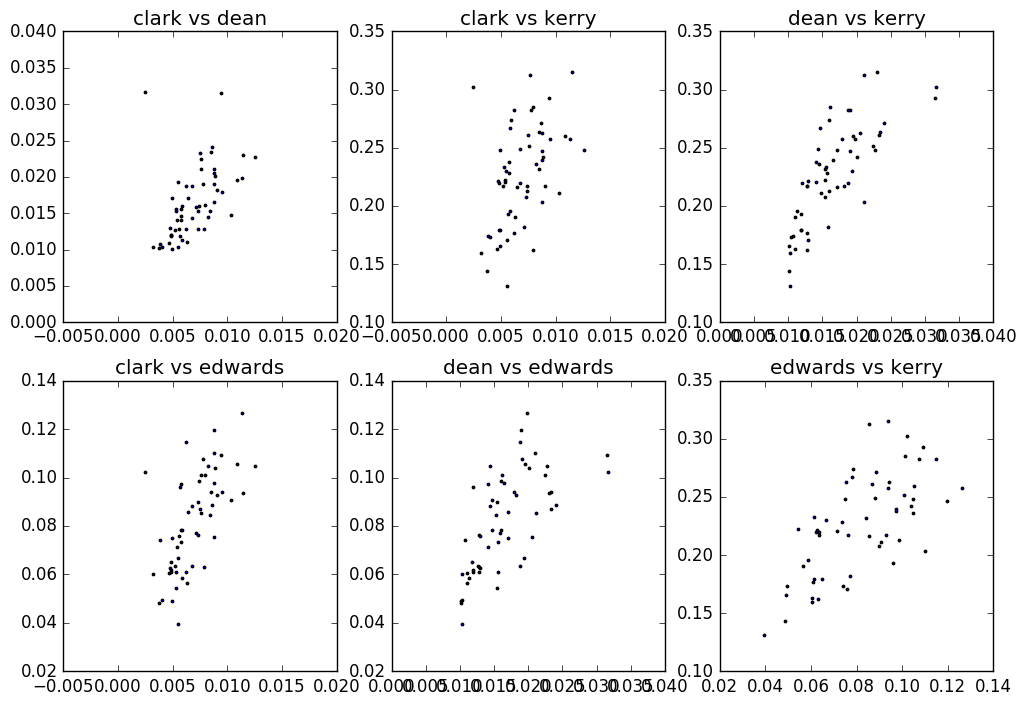

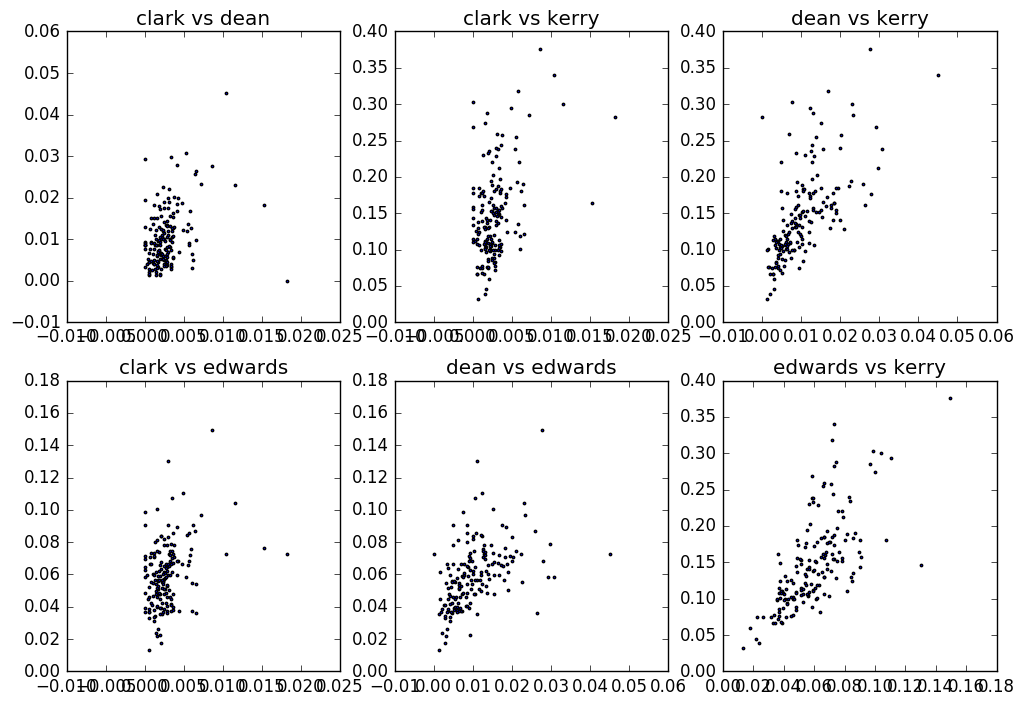

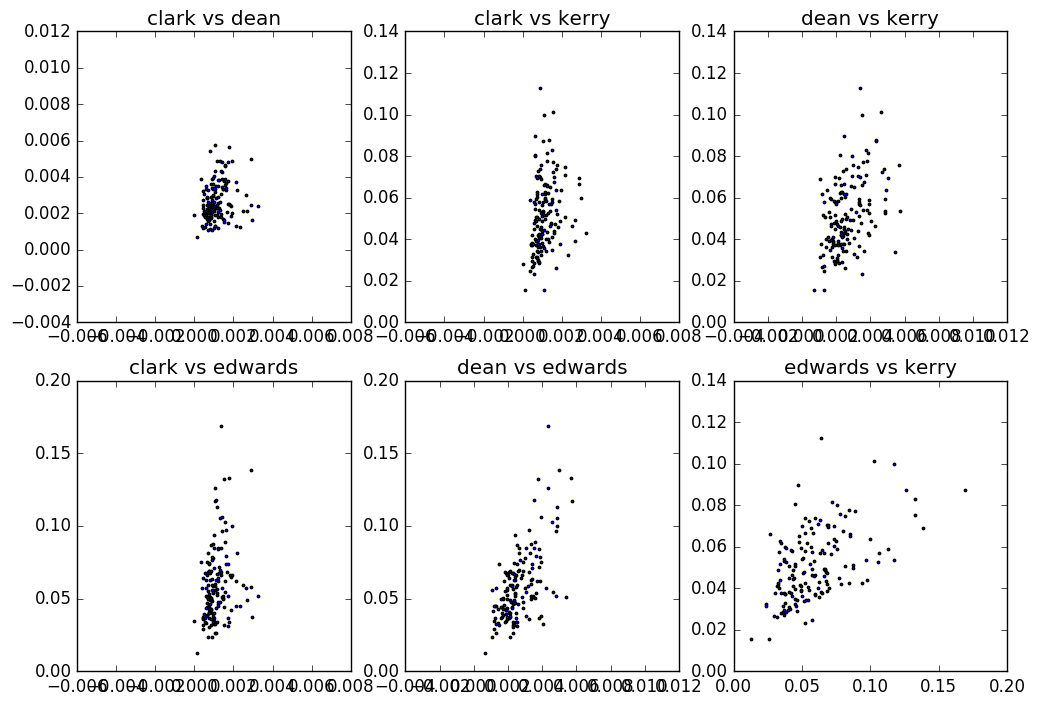

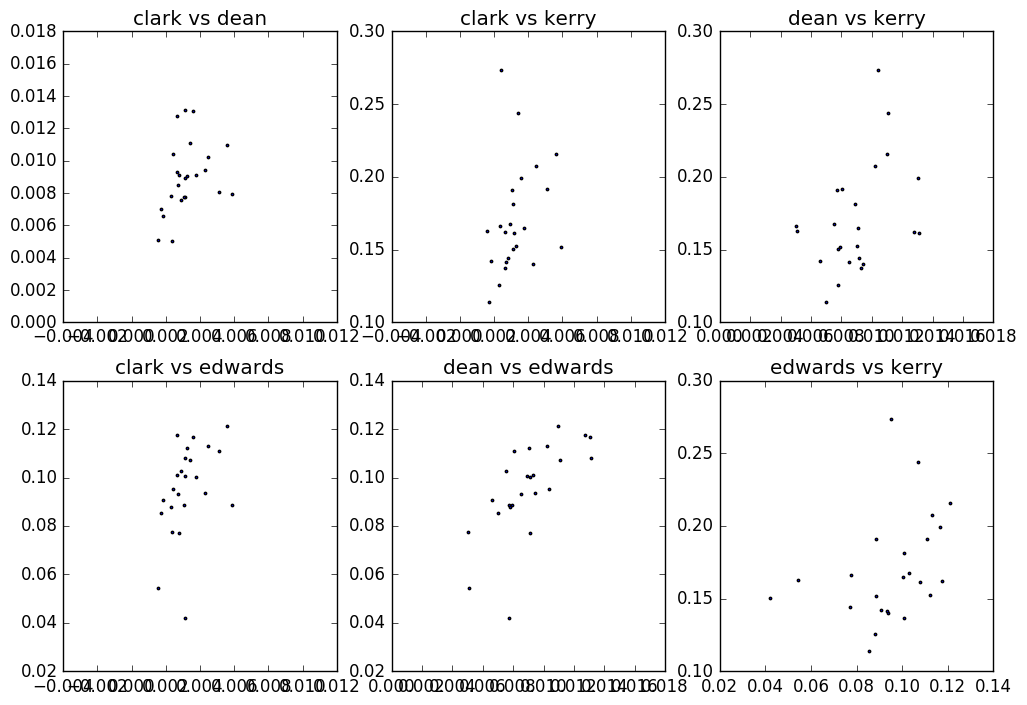

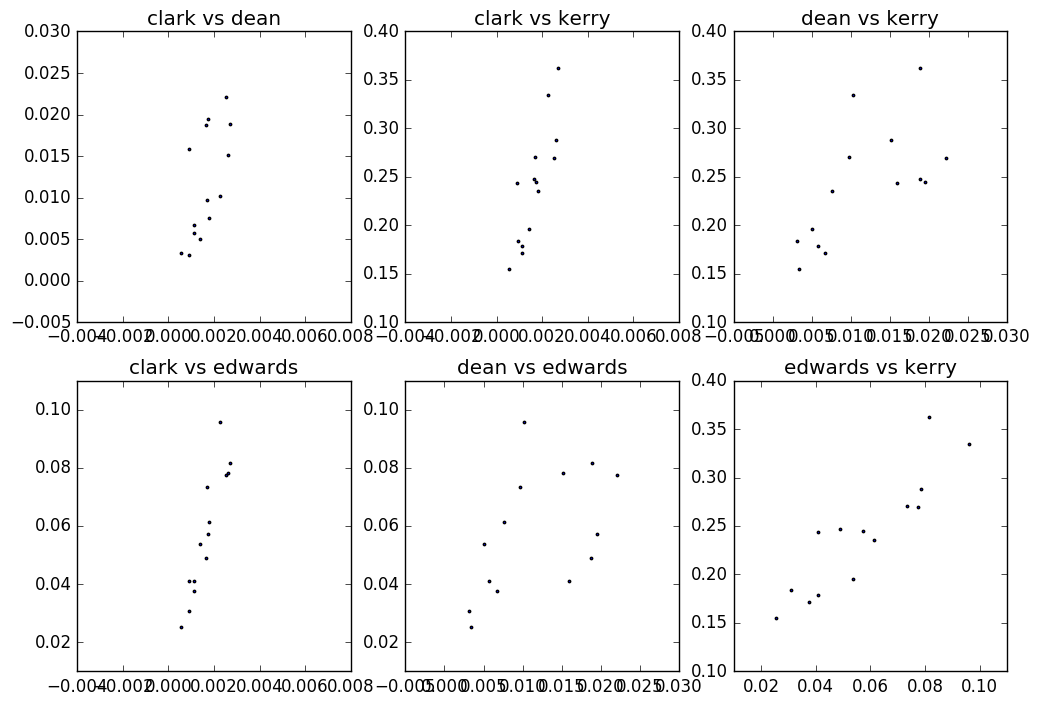

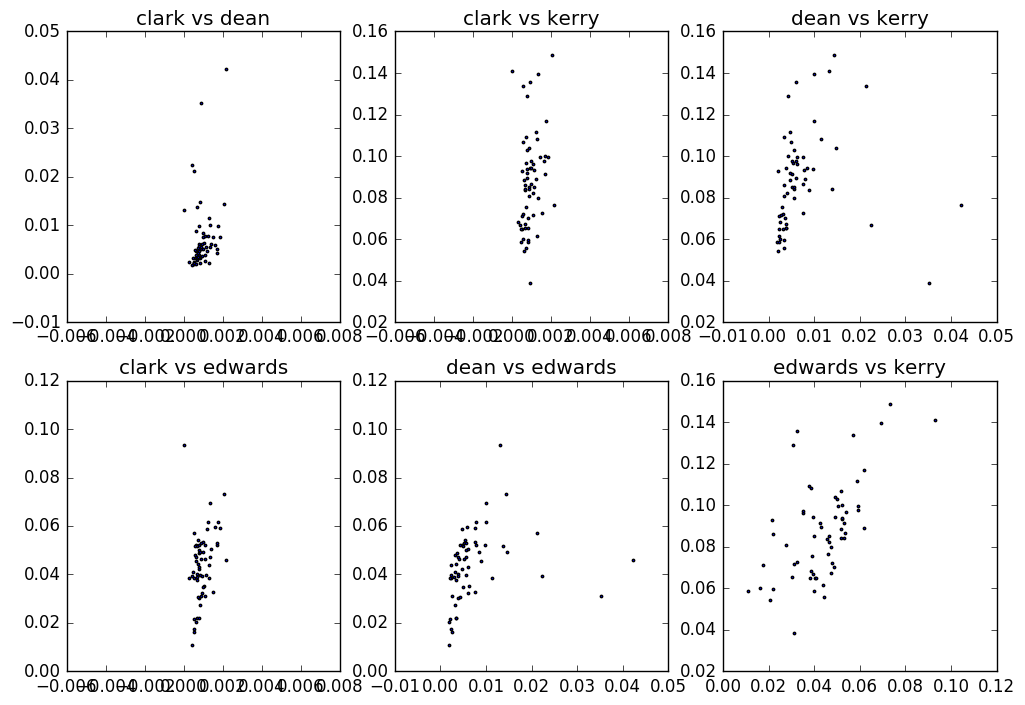

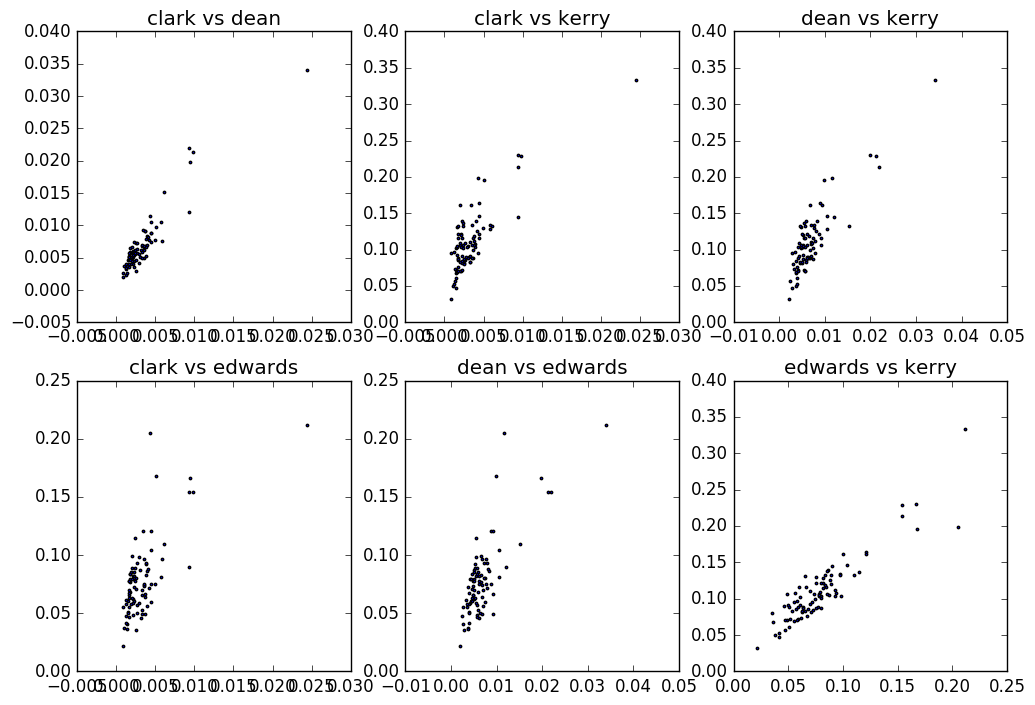

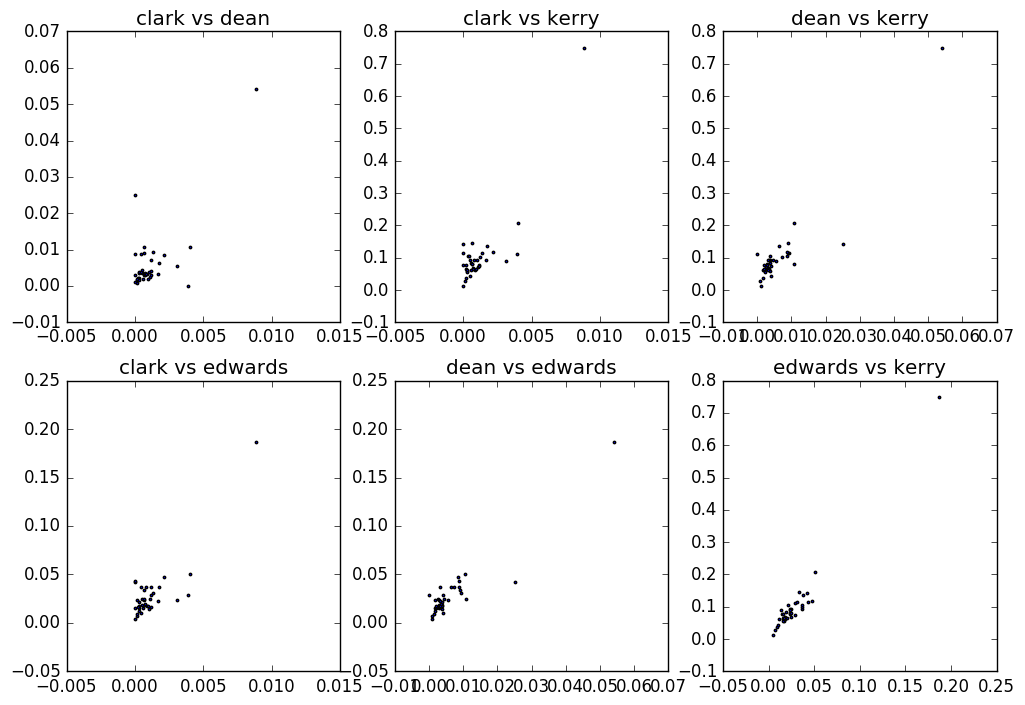

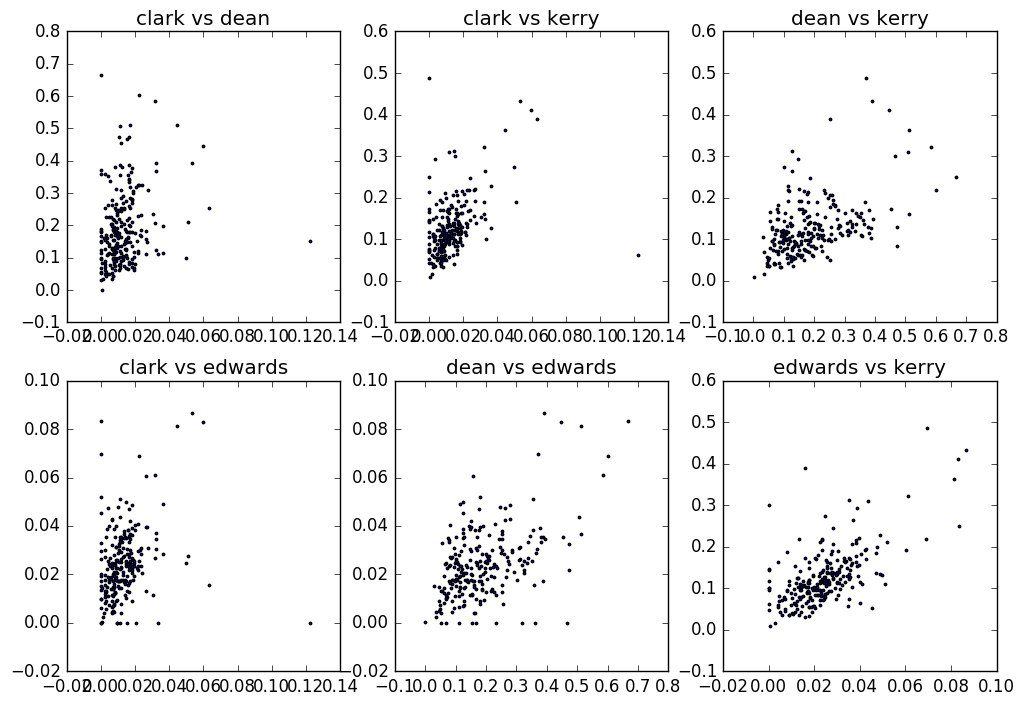

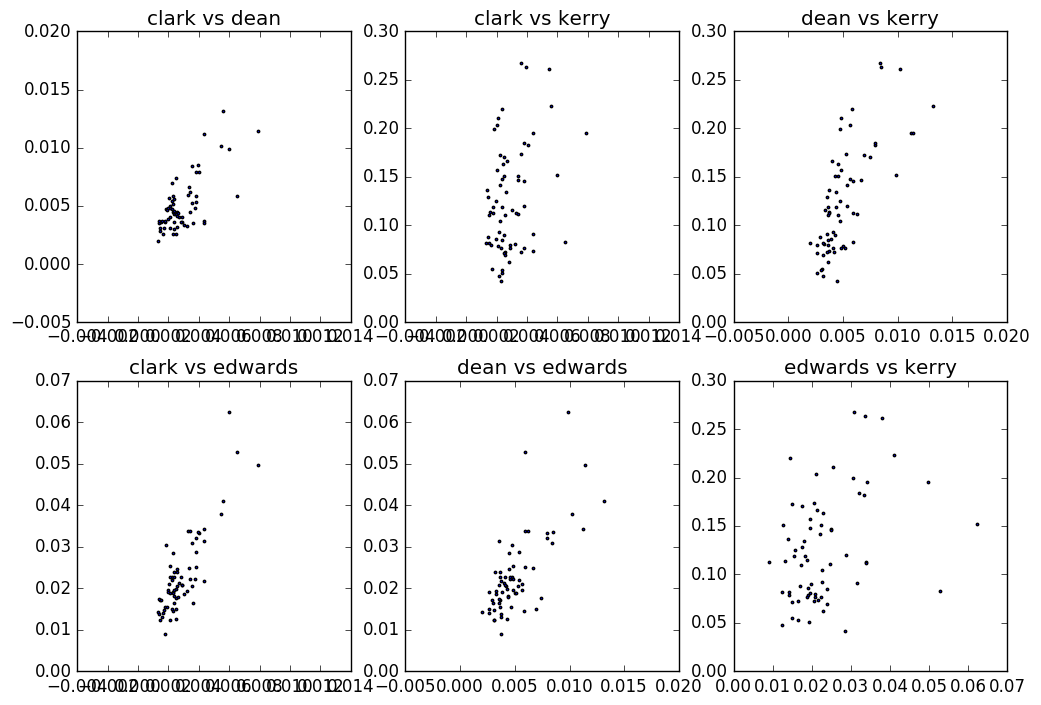

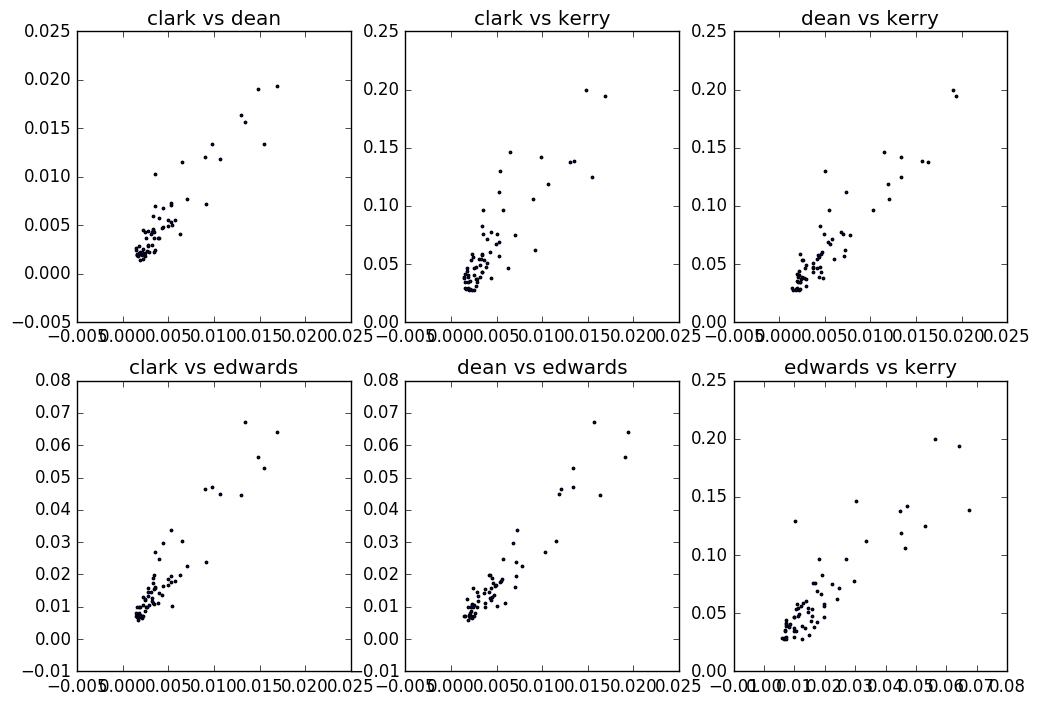

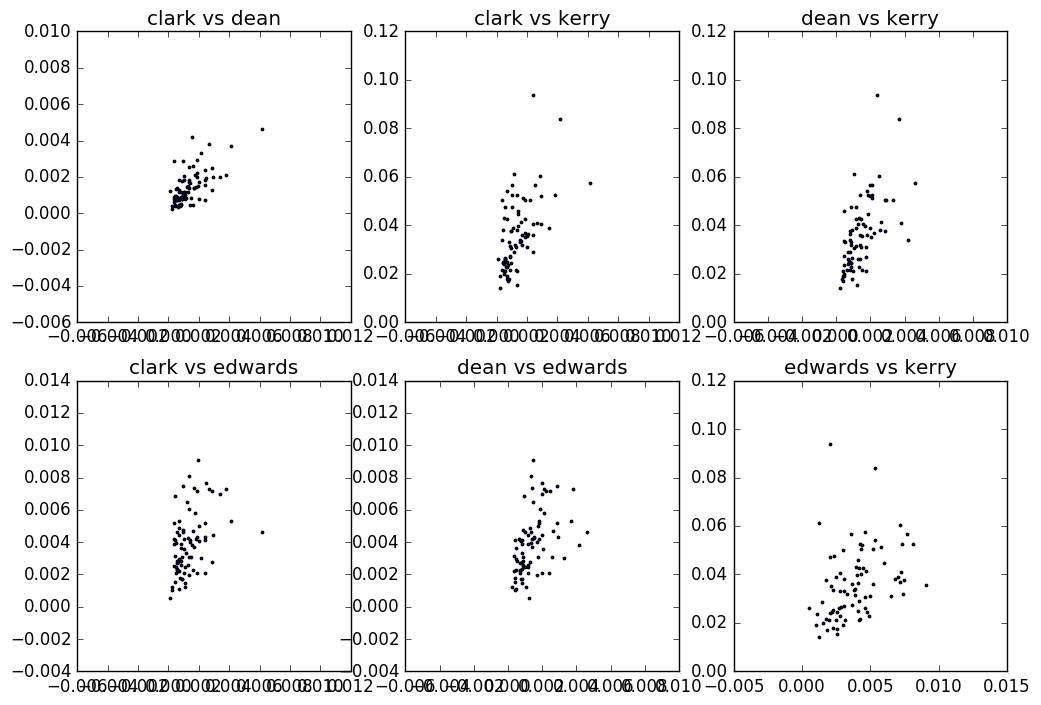

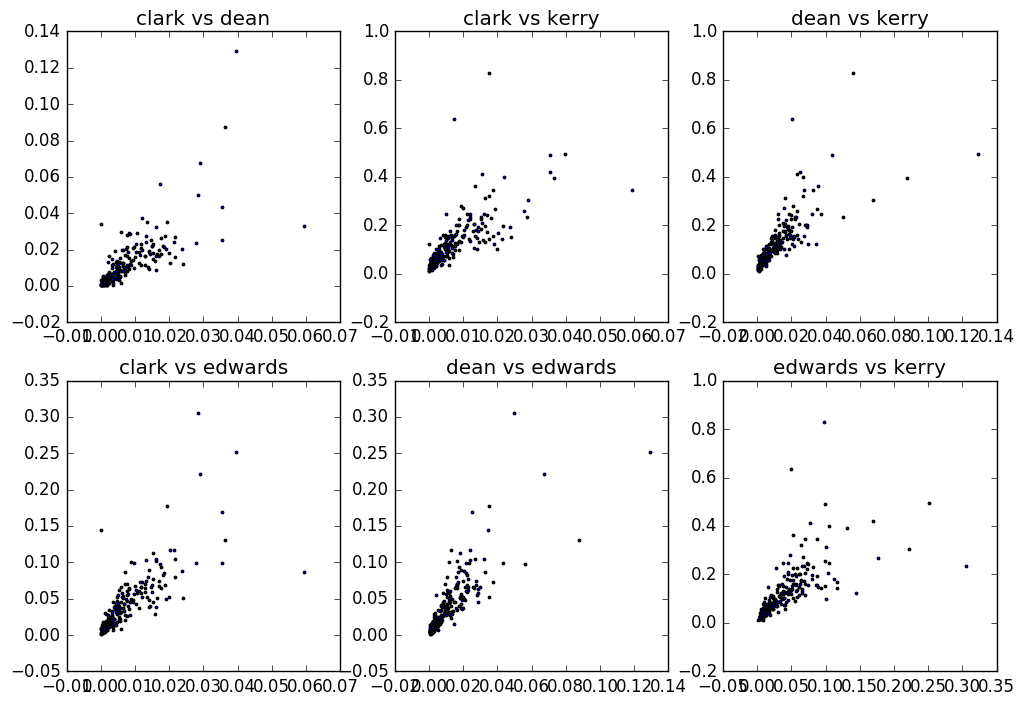

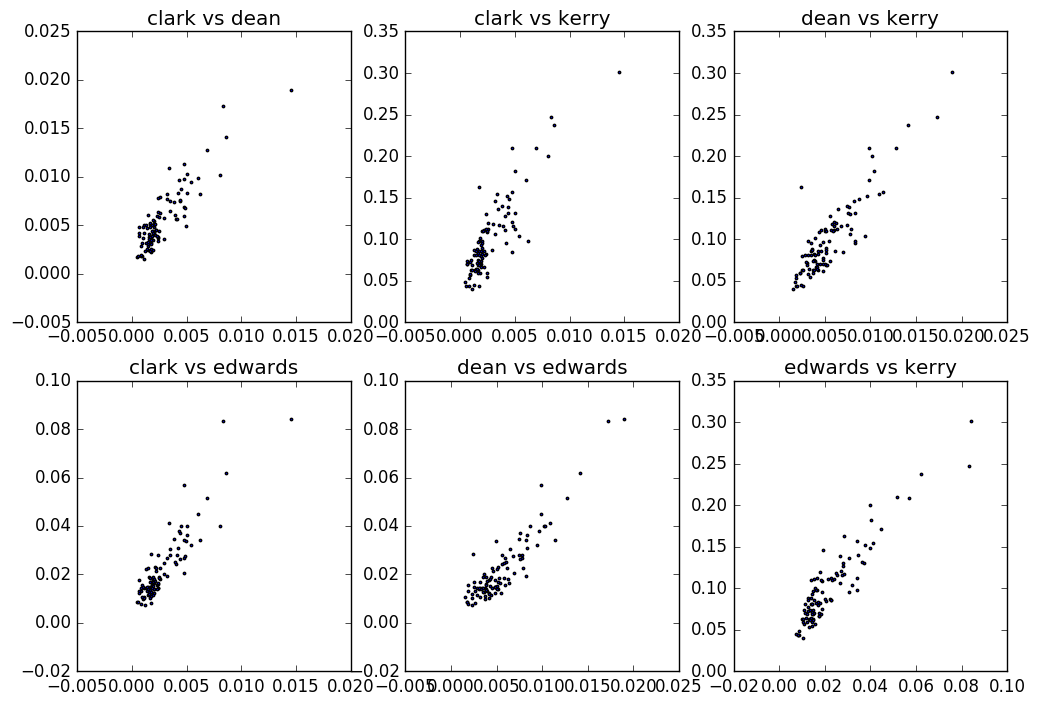

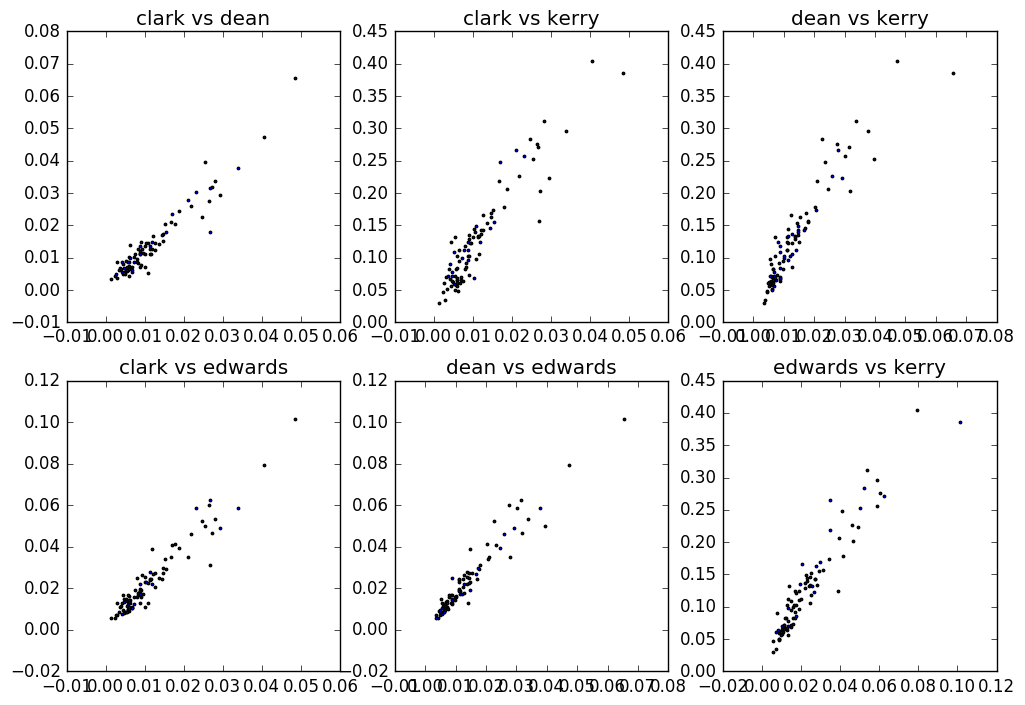

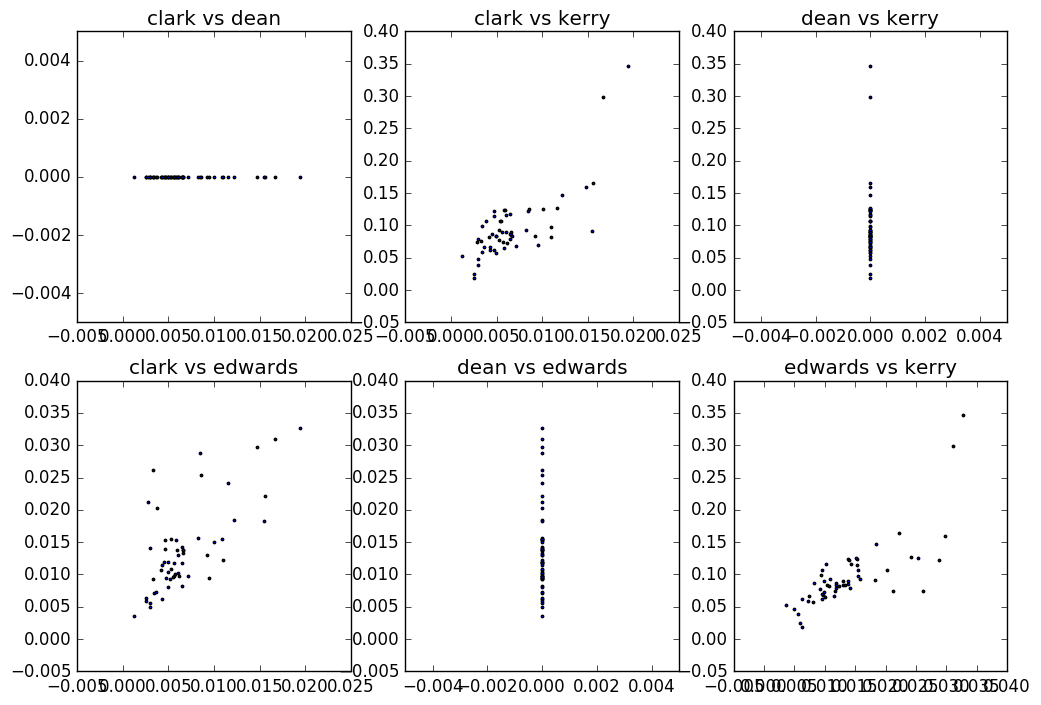

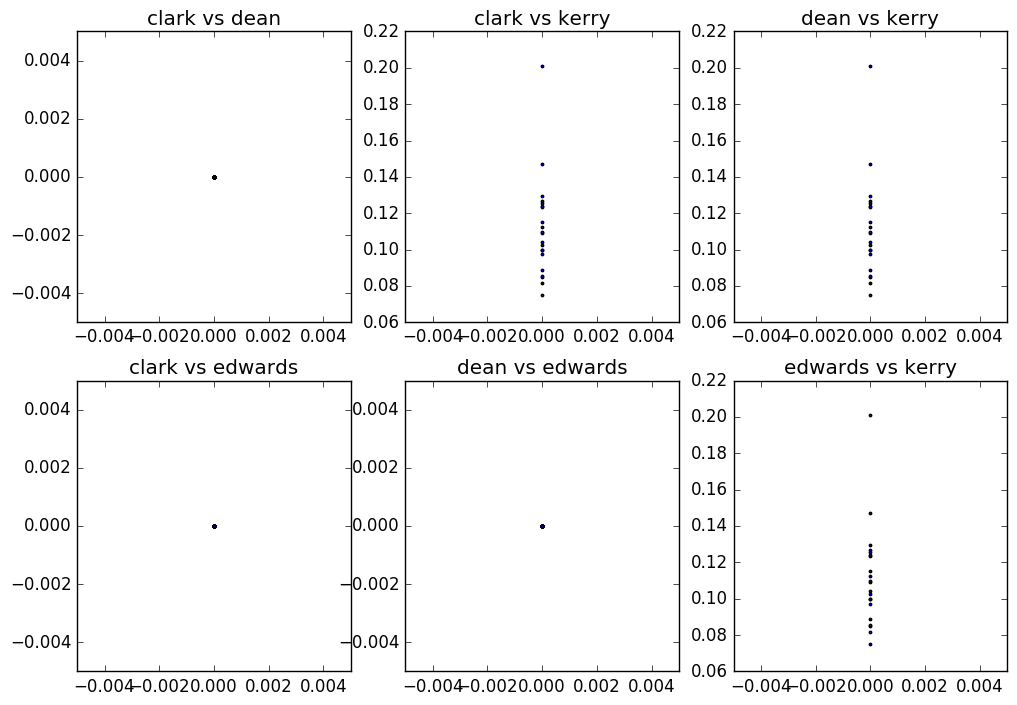

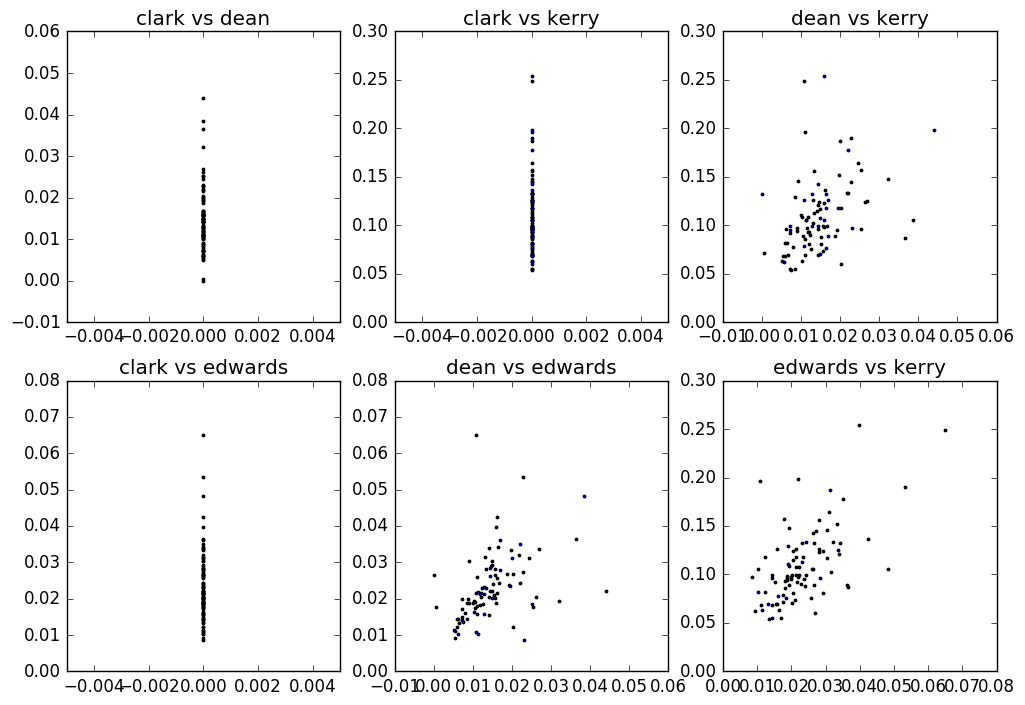

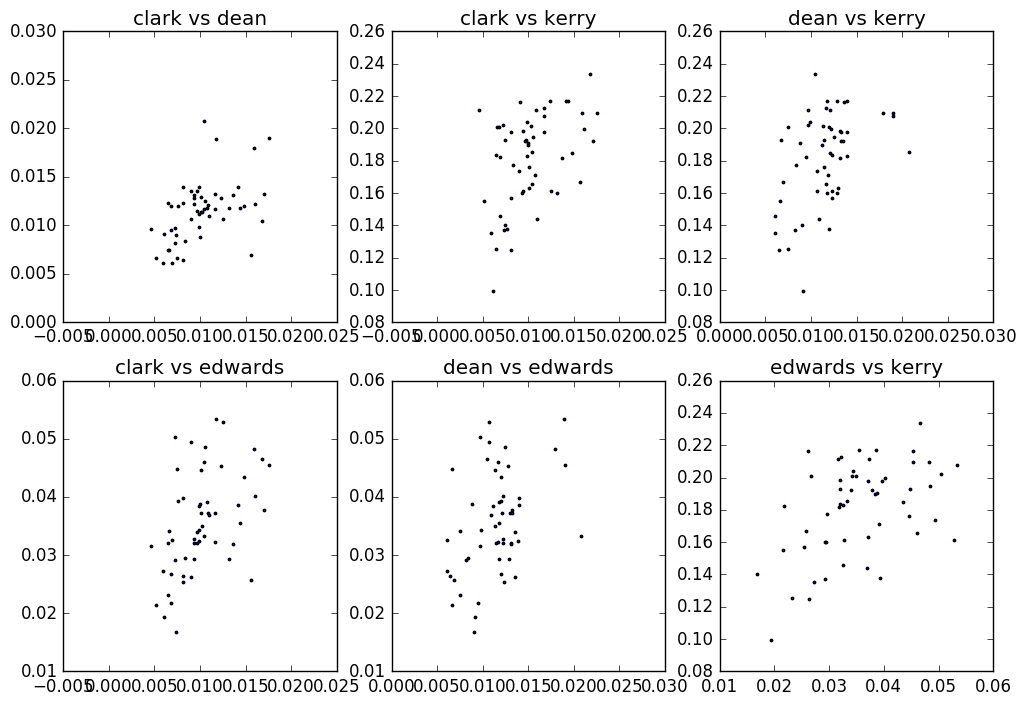

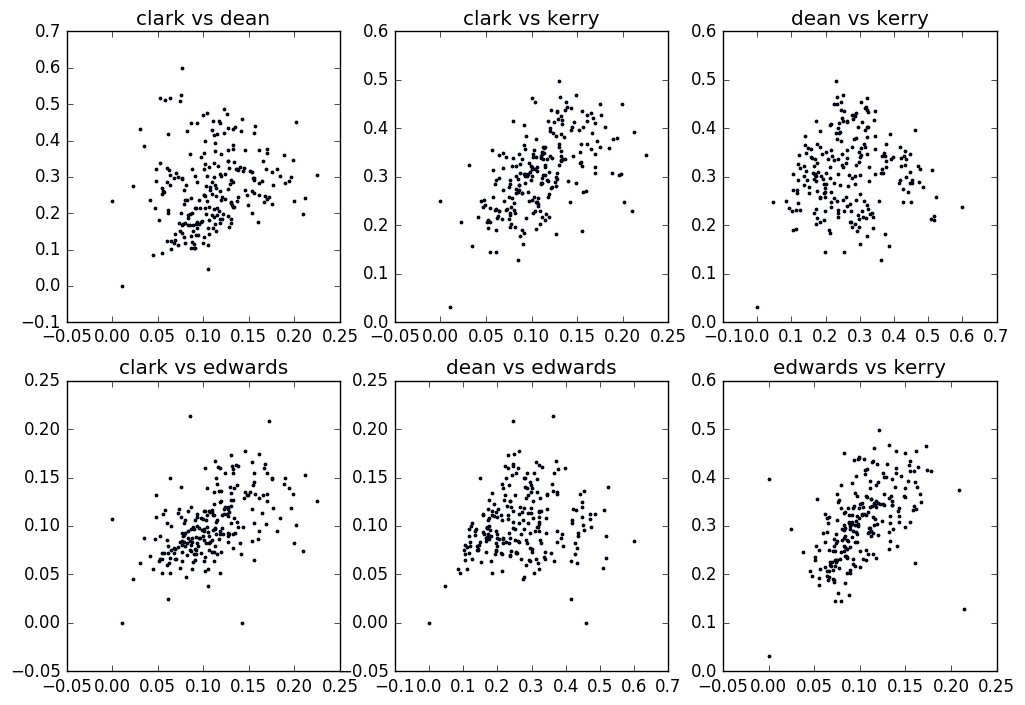

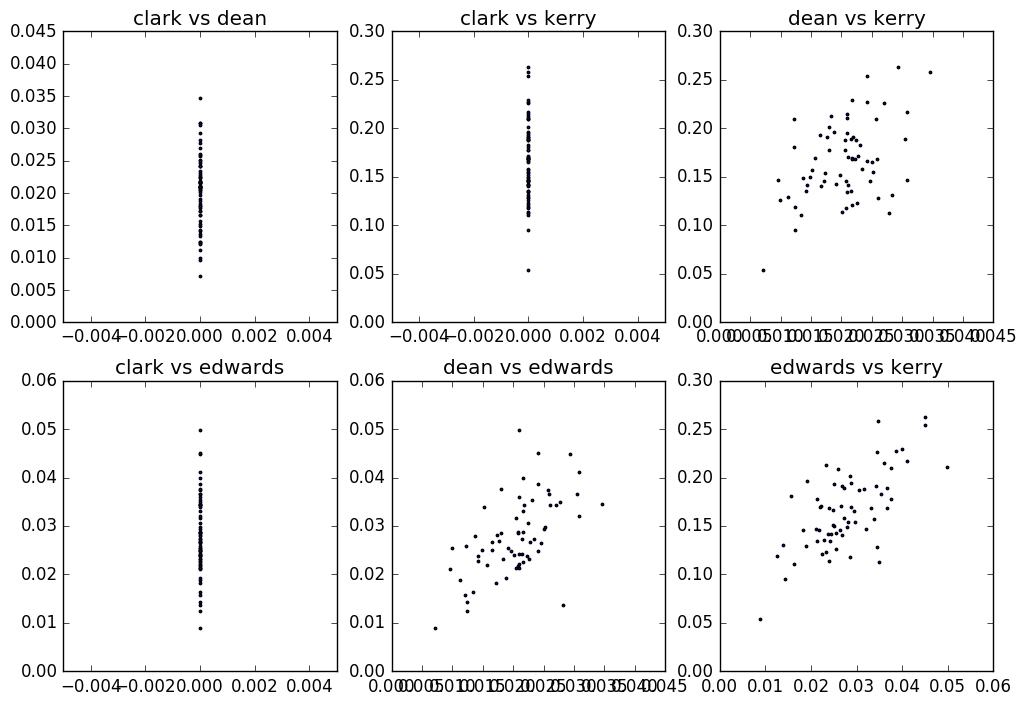

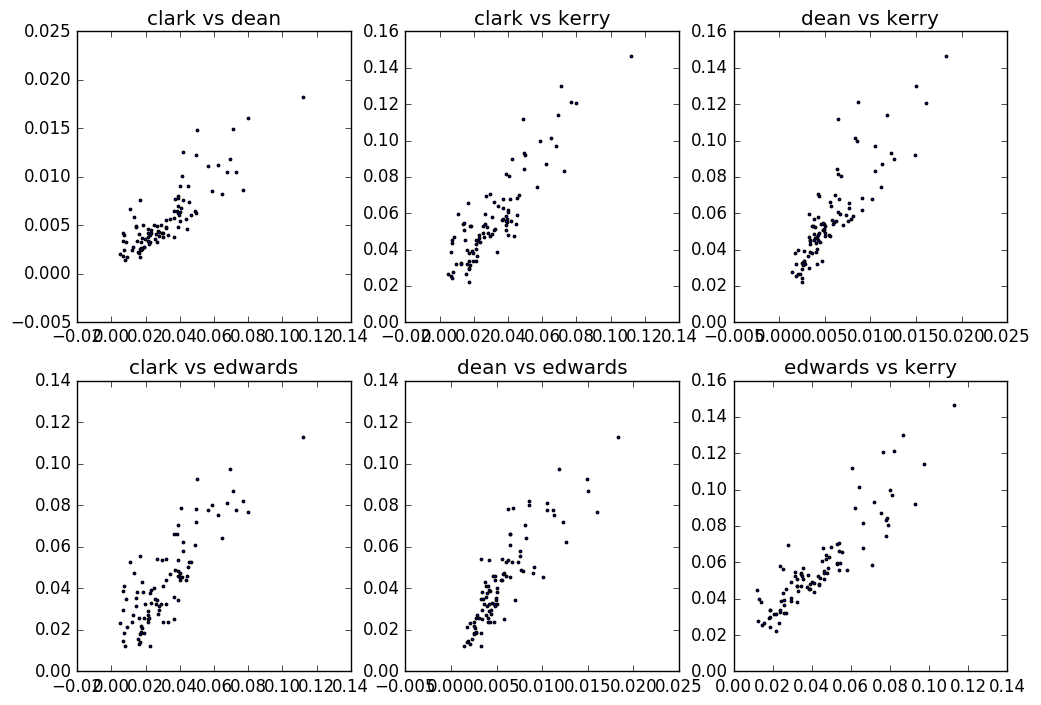

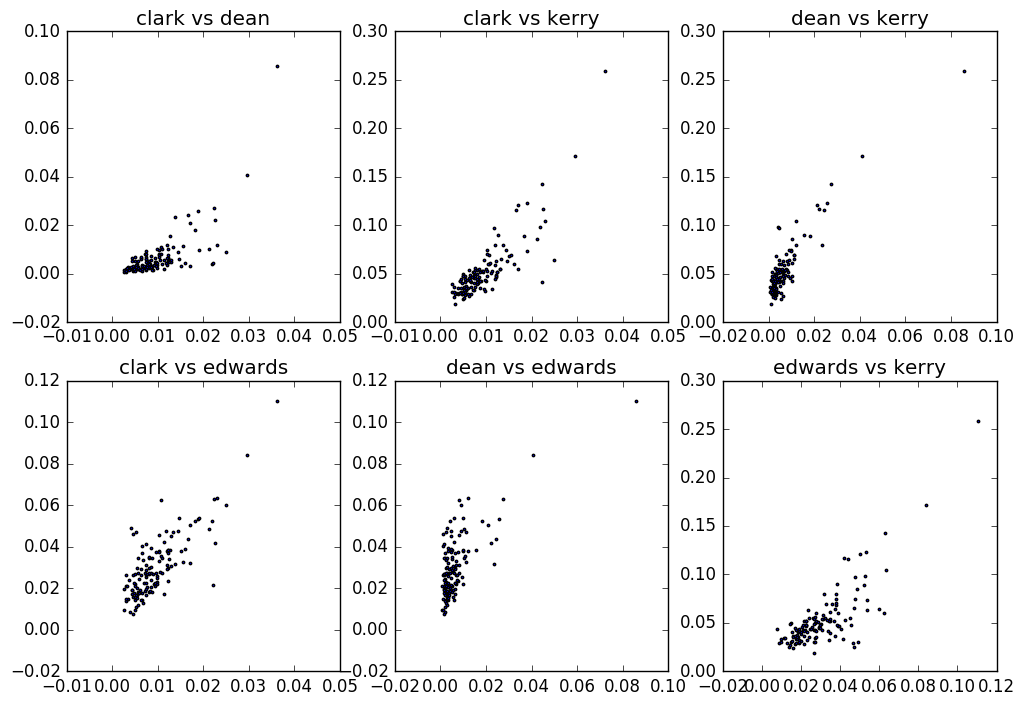

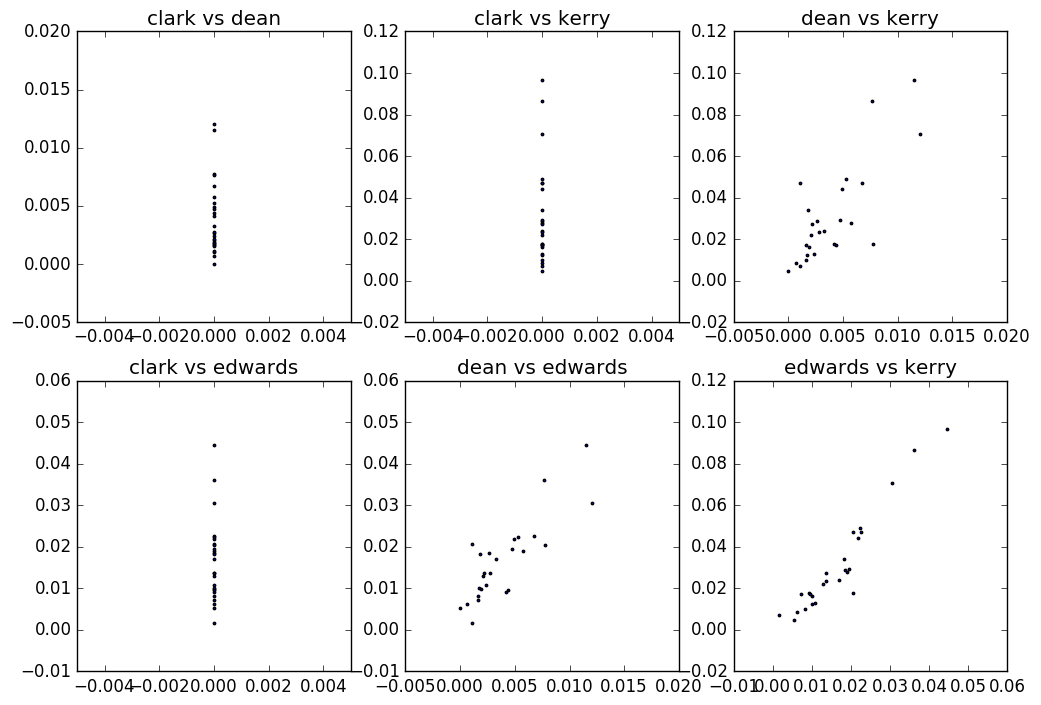

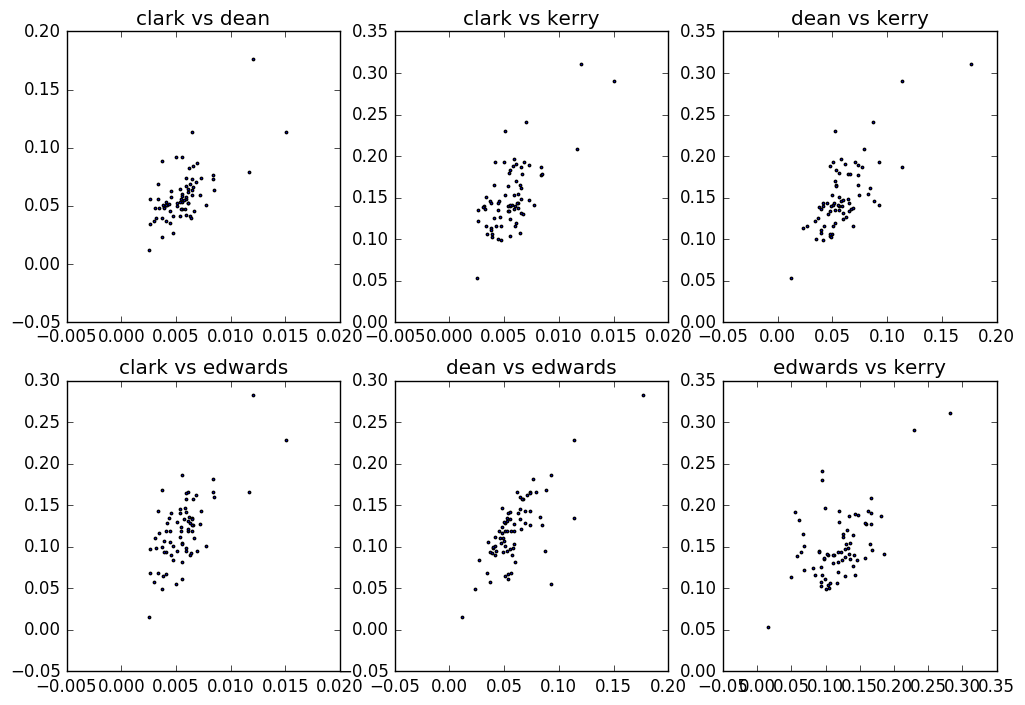

In [10]:
# Votes_sを用いる
plt = PyPlot
names = ["clark", "dean", "edwards", "kerry"]
DeltaO  = 0.6891
DeltaMO = 0.5366
combination = [(i, i+j) for i in 1:3 for j in 1:(4-i)]

for S in 1:size(Cand,1)

    DELTA = DeltaO*Open+DeltaMO*MOpen
    RTOT = RDemHat.*(1+DELTA)-VOther
    RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
    RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
    Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4))

    num_rows, num_cols = 2, 3
    fig, axes = subplots(num_rows, num_cols, figsize=(12, 8))
    axes = vec(axes)

    # cand1 vs cand2で、cand1が横軸、cand2が縦軸
    for (n,c) in enumerate(combination)
        cand1 = names[c[1]]
        cand2 = names[c[2]]
        ax = axes[n]
        ax[:scatter](Votes_s[:, c[1]], Votes_s[:, c[2]], s = 3)
        ax[:set_title]("$cand1 vs $cand2")
        #ax[:set_xticks]([0,0.25,0.5,0.75])
        #ax[:set_yticks]([0,0.25,0.5,0.75])
        savefig("state_number_$S")
    end
end
        
    


In [31]:
# 時系列の方
# 投票率低すぎでは？
S = 4
RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
sum(Votes[Cand[S, 14]:Cand[S, 15], :], 1)./ sum(RTot_s)


1×4 Array{Float64,2}:
 0.0151485  0.01657  0.0175847  0.080347

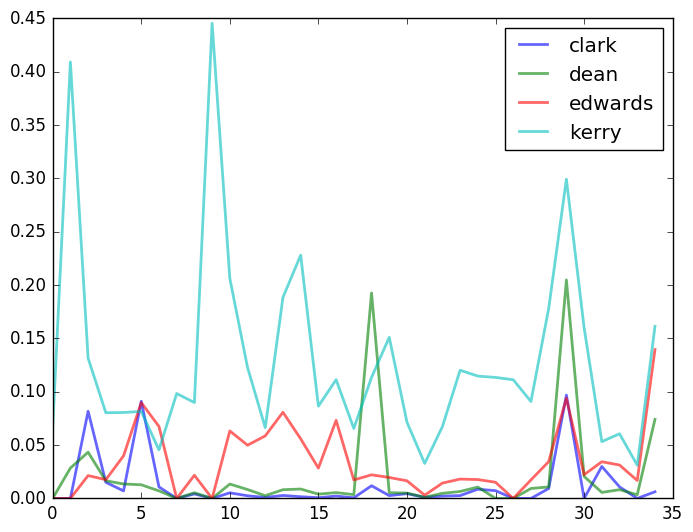

In [35]:
shares = Array(Float64, size(Cand,1), 4)

for S in 1:size(Cand,1)
    shares[S,:] = sum(Votes[Cand[S, 14]:Cand[S, 15], :], 1)./ sum(RTOT[Cand[S, 14]:Cand[S, 15], :])
end

fig, ax = subplots()
for i in 1:4
    cand = names[i]
    ax[:plot](shares[:, i], linewidth=2, alpha=0.6, label="$cand")
end
ax[:legend]()
savefig("vote_share_states")

## 以下simulation
### パラメータは以下のとおり

```
FAlph = Array(Float64, 2, 1)
# setting parameters
param[2] = -1
C0 = 0
# Raceの変更に伴い、Cxも4つの要素にする必要がある。
q = 4
Cx = param[1:q]
Cz = -abs(param[q+1:q+3])
FAlph[1,1] = abs(param[q+4])
FAlph[2,1] = abs(param[q+5])
param[q+4:q+5] = FAlph[1:2,1]
Sig_xsi  = max(0.5, abs(param[q+6]))
param[q+6] = Sig_xsi
DeltaO  = 0.6891
DeltaMO = 0.5366
# Raceをいじった関係でこのvkを4*4 = 16この要素にしなくちゃいけない
vk = param[12:27]
composite = param[75:149]
Tij = abs(param[150:260])

# new parameters
# rho_eta = abs(param[261])
rho_eta = 1
rho_chi = param[262:265]
mu_chi = param[266:269]
chi = param[270:273]
```
